<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [751]:
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [752]:
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [753]:
df= pd.read_csv(r'C:\Users\Rayan\Downloads\Compressed\16267649167294424\Mini Project 2 - Regression (Bike Sharing Demand)\train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [754]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4880,2011-11-16 10:00:00,4,0,1,3,18.86,22.725,94,0.0000,4,32,36
3913,2011-09-14 02:00:00,3,0,1,1,24.60,28.030,83,0.0000,1,4,5
1390,2011-04-03 19:00:00,2,0,0,2,17.22,21.210,44,12.9980,51,93,144
2621,2011-06-17 03:00:00,2,0,1,1,22.96,26.515,94,7.0015,1,5,6
6806,2012-04-01 21:00:00,2,0,0,2,20.50,24.240,59,11.0014,33,101,134


In [755]:
df.shape

(10886, 12)

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [757]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [758]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [759]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [760]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Data Preprocessing

In [761]:
from sklearn.preprocessing import LabelEncoder
encode_datetime = LabelEncoder()
df['datetime'] = encode_datetime.fit_transform(df['datetime'])

df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [762]:
print(df.corr()['count'])

datetime      0.310810
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64


In [763]:
df = df[['datetime','temp','humidity','atemp','season','count','weather']]
df

,datetime,temp,humidity,atemp,season,count,weather
0,0,9.84,81,14.395,1,16,1
1,1,9.02,80,13.635,1,40,1
2,2,9.02,80,13.635,1,32,1
3,3,9.84,75,14.395,1,13,1
4,4,9.84,75,14.395,1,1,1
...,...,...,...,...,...,...,...
10881,10881,15.58,50,19.695,4,336,1
10882,10882,14.76,57,17.425,4,241,1
10883,10883,13.94,61,15.910,4,168,1
10884,10884,13.94,61,17.425,4,129,1


In [764]:
##X = np.asarray(df[['temp', 'humidity', 'datetime',season ]])
#X = preprocessing.StandardScaler().fit(X).transform(X)

#X


In [765]:
#Y= np.asarray(cdf['count'])
#Y= preprocessing.StandardScaler().fit_transform(df[['count']]).flatten()

#Y

## Strorytelling - Visualization

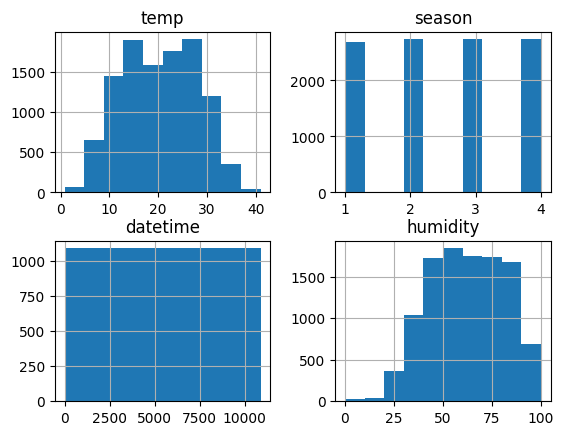

In [766]:
viz = df[['temp','season','datetime','humidity']]
viz.hist()
plt.show()

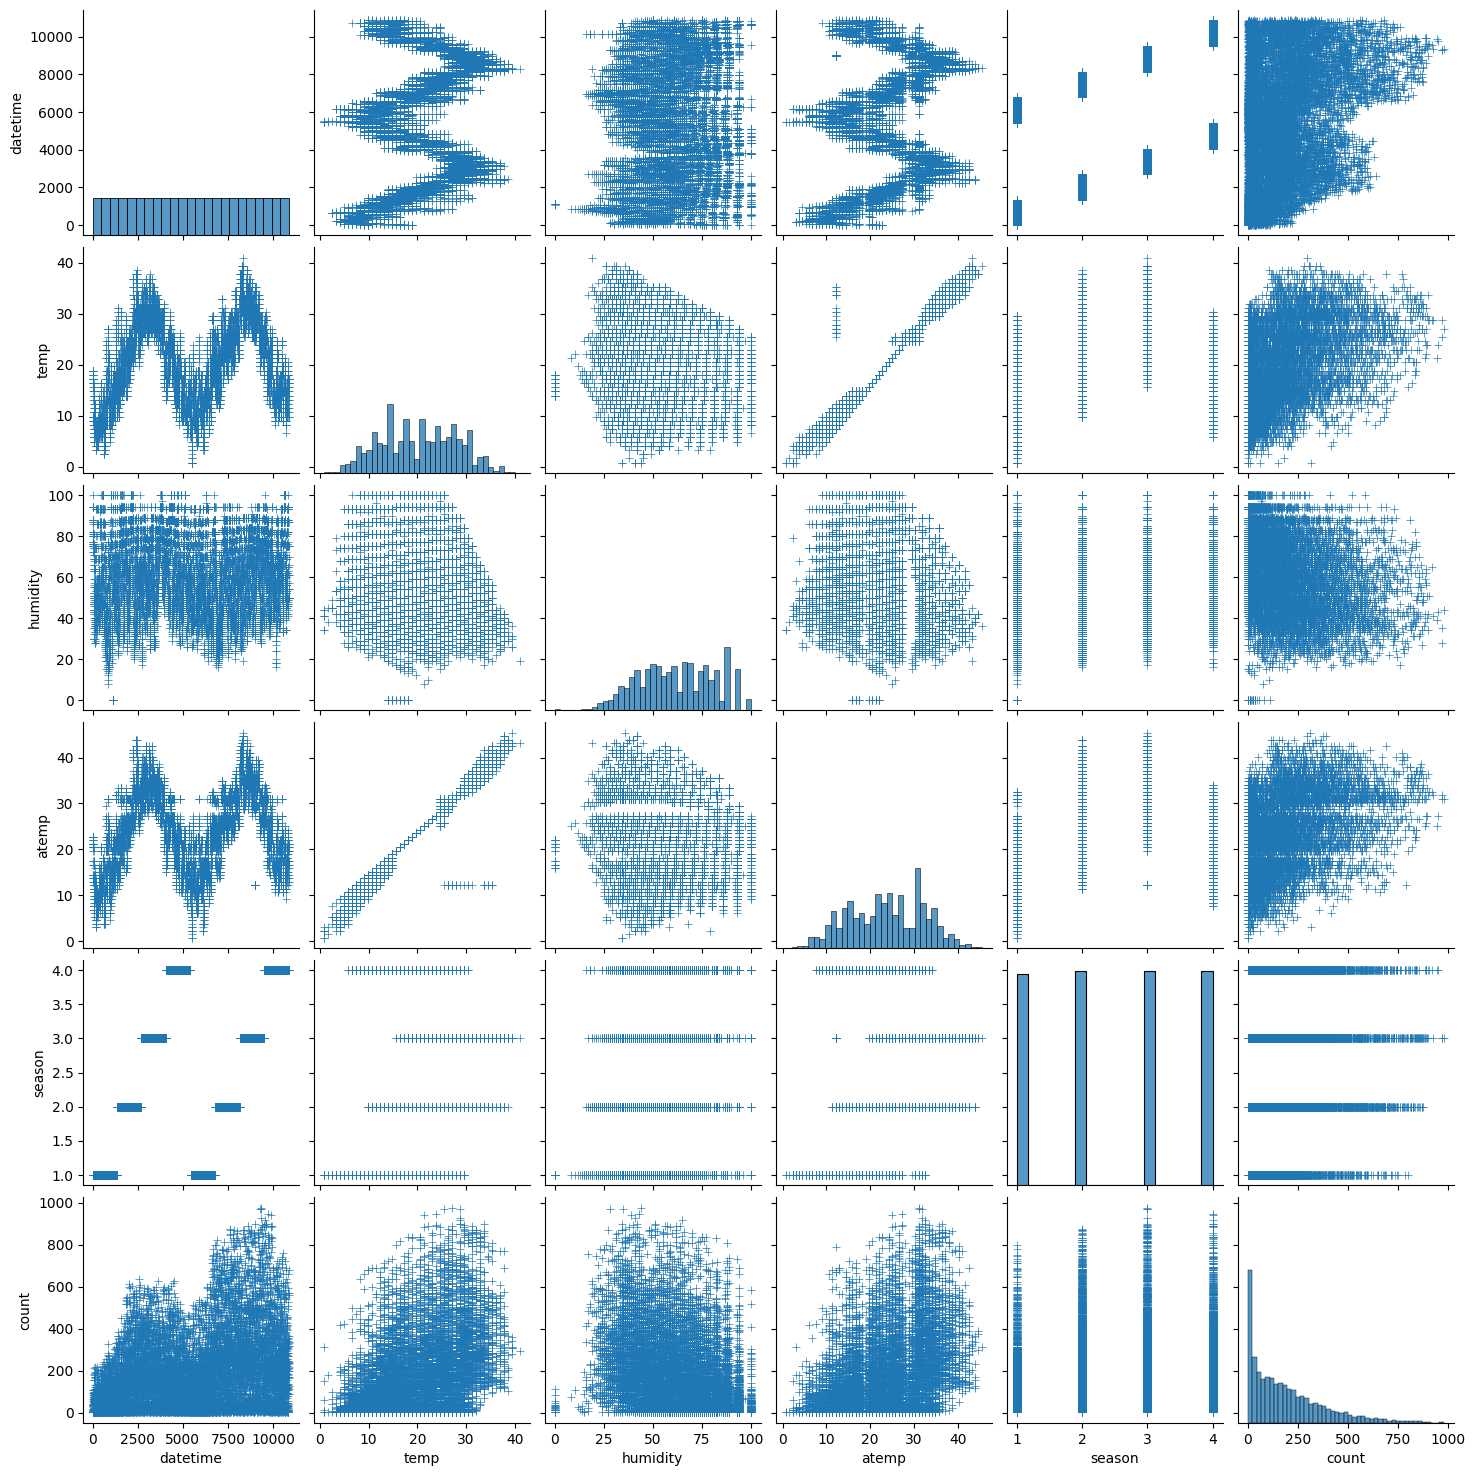

In [669]:
g = sns.pairplot(df, markers='+')
plt.show()

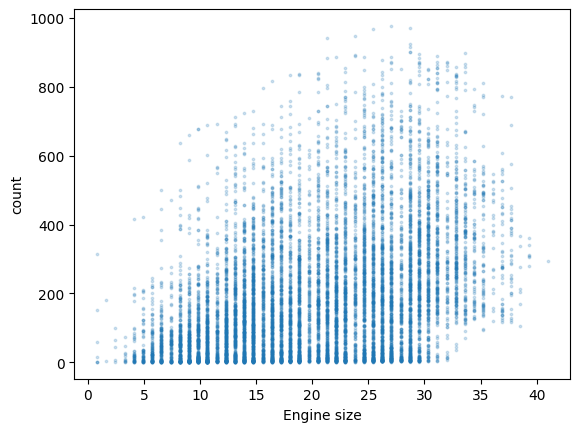

In [767]:
x = df['temp']
y = df['count']
plt.xlabel("Engine size")
plt.ylabel("count")
plt.scatter(x, y, 3 , marker='o',alpha=0.2)
plt.show()

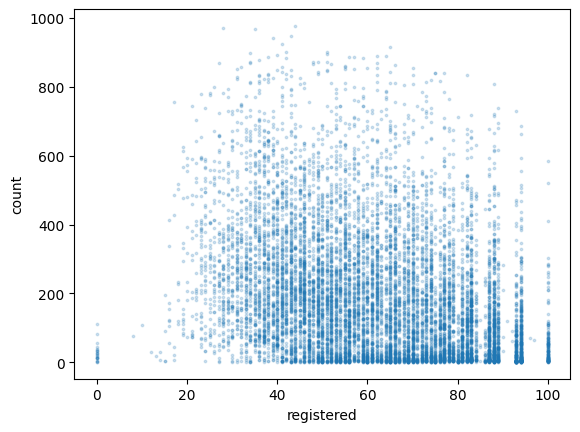

In [768]:
x = df['humidity']
y = df['count']
plt.xlabel("registered")
plt.ylabel("count")
plt.scatter(x, y, 3 , marker='o',alpha=0.2)
plt.show()

## Train your model (Regression)

In [769]:
from sklearn import metrics

In [770]:
X = np.asarray(df[['temp', 'humidity', 'atemp','season','datetime','humidity','weather']])
X = preprocessing.StandardScaler().fit(X).transform(X)
y= np.asarray(df['count'])
y= preprocessing.StandardScaler().fit_transform(df[['count']]).flatten()





In [771]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [772]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

LinearRegression()

In [777]:
mlr.intercept_

-0.003925930688473166

In [778]:
mlr.coef_

array([ 1.26926287e-01,  5.86135531e+12,  1.95312500e-01,  2.51464844e-02,
        2.38891602e-01, -5.86135531e+12, -1.27868652e-02])

In [779]:
# Model prediction on train data
y_pred = mlr.predict(X_train)

In [780]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.3038301676395969
MAE: 0.6281560157613117
MSE: 0.6897061919171829
RMSE: 0.8304855157780796


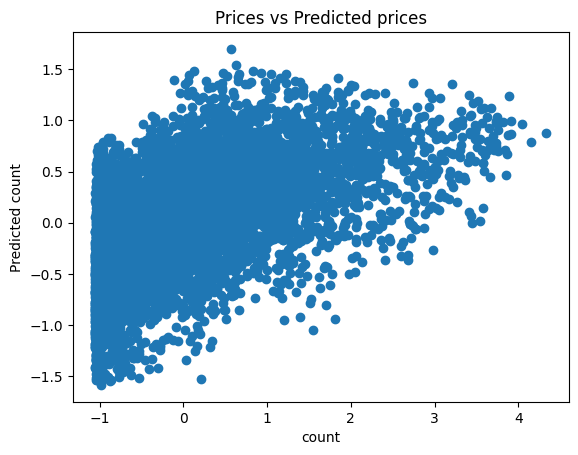

In [781]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("Prices vs Predicted prices")
plt.show()

In [782]:
X = df[['temp']]
#X = data["ZN"].values.reshape((-1,1))
y = df['count']

In [783]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [784]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

LinearRegression()

In [785]:
slr.intercept_

7.96570909819232

In [786]:
slr.coef_

array([9.06172182])

In [787]:
# Model prediction on train data
y_pred = slr.predict(X_train)

In [788]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.15338956811520033
MAE: 126.3619891013409
MSE: 27519.63866779788
RMSE: 165.89044176141638


# Polynomial regression:

In [789]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [790]:
metrics.r2_score(y_train, y_train_predicted)

0.153749818932172

In [791]:
metrics.r2_score(y_test, y_test_predicted)

0.16101379808224114

In [792]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
# predicting on training data-set
y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))

In [793]:
metrics.r2_score(y_train, y_train_predicted)

0.15508458861904784

## Test Result

## Send us the Result (Maktabkhoone)